<a href="https://colab.research.google.com/github/yoojungsun0/uci-psych203/blob/main/PSYCH203B_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Go visualize the data. How does resp change as a function of target for sessionID 361?



In [1]:
import pandas as pd
from urllib.request import Request, urlopen
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/PerceptionCognitionLab/data2/master/out/morph1.dat"
url_request  = Request(url)
data = urlopen(url_request )
df = pd.read_table(data, header=0, sep=' ')
df.head(5)

,datID,sessionID,block,trial,background,target,forePeriod,resp,rt
0,1,360,0,0,0,1,32,0,1.262
1,2,360,0,1,0,8,31,0,0.934
2,3,360,0,2,0,9,35,1,0.604
3,4,360,0,3,0,0,31,0,0.617
4,5,360,0,4,0,7,31,0,0.486


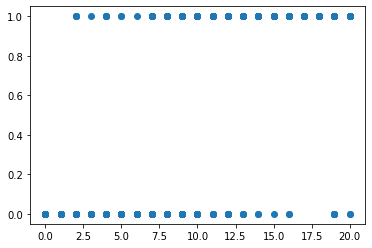

In [2]:
s361 = df.loc[df['sessionID'] == 361]

x = np.asarray(s361['target'])
y = np.asarray(s361['resp'])
X = x.reshape(-1,1)

plt.scatter(x, y, marker='o')


2. Fit a logistic regression model to it. What are the best parameter estimates?



In [3]:
from scipy.optimize import curve_fit

def make_p(q):
  return 1 / (1+np.exp(-q))

def nll(par, x, dat):
  q = par[0] + par[1]*x
  p = make_p(q)
  llvec = dat*np.log(p) + (1-dat)*np.log(1-p)
  return -np.sum(llvec)

popt, pcov = curve_fit(nll, X,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [4]:
popt

array([-2.5454863 ,  1.01098412])

In [5]:
pcov

array([[inf, inf],
       [inf, inf]])

In [6]:
def new_func(x, alpha, beta):
  q = alpha + beta*x
  p = make_p(q)
  return p

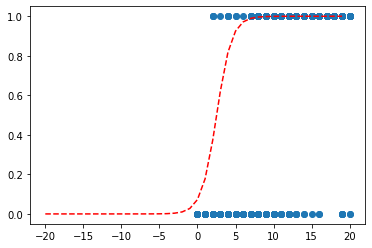

In [8]:
plt.scatter(X,y, marker='o')
# x = s361['target']
x=np.arange(-20,20)
plt.plot(x,new_func(x,*popt), 'r--')

3. How does this regression model account for the data? Visualize it. You should be able to draw the logistic curve at the MLE on top of the data. Then you can inspect the results to look for misfits.